<a href="https://colab.research.google.com/github/Abecid/deepest-quest/blob/main/2023-Spring%20/NLP/NLP_Quest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# NLP Quest

## Summary
    # 1. Trasformer
    # 2. Data Normalization
    # 3. MLP (Classification)

In [ ]:
import pandas as pd

# Data
train_data_path = '/Users/adamlee/Downloads/Deepest/deepest-quest/2023-Spring/NLP/data/utkmls-twitter-spam-detection-competition/train.csv'
test_data_path = '/Users/adamlee/Downloads/Deepest/deepest-quest/2023-Spring/NLP/data/utkmls-twitter-spam-detection-competition/test.csv'

train_data_path = 'https://raw.githubusercontent.com/Abecid/deepest-quest/main/2023-Spring/NLP/data/utkmls-twitter-spam-detection-competition/train.csv'
test_data_path = 'https://raw.githubusercontent.com/Abecid/deepest-quest/main/2023-Spring/NLP/data/utkmls-twitter-spam-detection-competition/test.csv'

# train_data = pd.read_csv(train_data_path).drop(columns=['following', 'followers', 'actions', 'is_retweet', 'location'])
# test_data = pd.read_csv(test_data_path).drop(columns=['following', 'followers', 'actions', 'is_retweet', 'location'])

train_data = pd.read_csv(train_data_path)[["Tweet", "Type"]]
test_data = pd.read_csv(test_data_path)[["Tweet"]]

# 0: Quality, 1: Spam
train_data['Type'] = train_data['Type'].map({'Quality': 0, 'Spam': 1})

train_data

,Tweet,Type
0,Good Morning Love @LeeBrown_V,0.0
1,'@realDonaldTrump @USNavy RIP TO HEROES',1.0
2,Haven't been following the news but I understa...,0.0
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,0.0
...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",1.0
14895,"They don't have to like you, and you don't hav...",0.0
14896,#Miami Graham Nash Live at Parker Playhouse #...,1.0
14897,@bethannhamilton is in the business of one-upp...,0.0


In [ ]:
test_data


,Tweet
0,"Cops shoot blacks almost everyday, and there a..."
1,"#HAPPYTAEYANGDAY Oppa,happy birthday to you, ..."
2,RT @HoneyBadger10: Panthers in the super bowl....
3,Sorry my Twitter keeps posting my retweets a m...
4,Heart attack causes and symptoms are different...
...,...
780,New Project For NLex Please @DreamscapePH @abs...
781,Actor DiCaprio joins growing movement to dives...
782,Just overheard 'looping in' 'reaching out' and...
783,Photoshoot time! #music #band #photoshootpic.t...


In [ ]:
train_data.loc[train_data['Tweet'] == "Women are really good at doing fucked up shit low key  you'll never know till after you got played"]

,Tweet,Type
644,Women are really good at doing fucked up shit ...,0.0


In [ ]:
len(test_data), test_data.iloc[:10]["Tweet"]

(785, 0    Cops shoot blacks almost everyday, and there a...
 1    #HAPPYTAEYANGDAY  Oppa,happy birthday to you, ...
 2    RT @HoneyBadger10: Panthers in the super bowl....
 3    Sorry my Twitter keeps posting my retweets a m...
 4    Heart attack causes and symptoms are different...
 5    don't facetime me or ask for a selfie after 8p...
 6    it is the one reason that actually scares me ....
 7    Our Latino Olympians: Puerto Rican Field Hocke...
 8    GBI: Man dies after being tazed by police duri...
 9    RT bocavista2016: DEAR #AMERICA  #FakeNews say...
 Name: Tweet, dtype: object)

In [ ]:
test_data.Tweet.values.tolist()

['Cops shoot blacks almost everyday, and there are still people who denies #policeBrutality is quite an issue #AntiPoliceBrutalityDay',
 '#HAPPYTAEYANGDAY  Oppa,happy birthday to you, pic.twitter.com/47kRvAZzGJ',
 'RT @HoneyBadger10: Panthers in the super bowl. Black panther outfits. #staywoke',
 'Sorry my Twitter keeps posting my retweets a million times.',
 'Heart attack causes and symptoms are different in women  #health',
 "don't facetime me or ask for a selfie after 8pm. you know damn well i already showered and won't stop looking like a hamster till 8am",
 'it is the one reason that actually scares me .I was taught in school that Turkey was part of Asia only 3% in Europehttps://twitter.com/COLRICHARDKEMP/status/731959637302497280\xa0…',
 'Our Latino Olympians: Puerto Rican Field Hockey Player Melissa Gonzalez https://t.co/rr0awGPcbi #RoadToRio #Rio2016 https://t.co/d0ikjen50F',
 'GBI: Man dies after being tazed by police during altercation and drug bust https://t.co/3lxNw77FaX ht

<Axes: xlabel='Type', ylabel='count'>

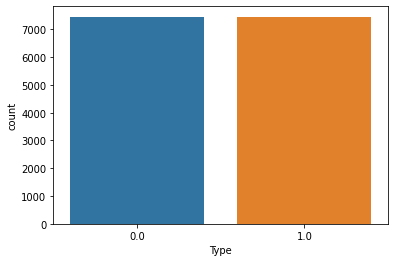

In [ ]:
import seaborn as sns
sns.countplot(x = train_data["Type"], data = train_data)

In [ ]:
from torchtext.models import XLMR_BASE_ENCODER
from sklearn.model_selection import train_test_split
import copy

# Split the data into training and testing sets with a 70/30 split
train_df, val_df = train_test_split(train_data, test_size=0.2, random_state=42)

train_df

,Tweet,Type
1891,Guys! Check out my playlist and new single #DU...,0.0
2996,#StopPoliceViolence #StopPoliceBrutality #Stop...,1.0
7341,Biology exam went better than I expected,0.0
12802,We are proud to be part of this study!https://...,0.0
4043,IBM's optical storage is 50 times faster than ...,0.0
...,...,...
5191,The amended #aqabiology specificationpic.twitt...,0.0
13418,We fail in people management when we do only I...,0.0
5390,#TrumpSlide coming to restore America! I can't...,1.0
860,'@johncardillo @realDonaldTrump https://t.co/I...,1.0


In [ ]:
import nltk

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

remove_non_alphabets =lambda x: re.sub(r'[^a-zA-Z]',' ',x)
tokenize = lambda x: word_tokenize(x)
ps = PorterStemmer()
stem = lambda w: [ ps.stem(x) for x in w ]
lemmatizer = WordNetLemmatizer()
leammtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x ]

def preprocess(data):
  print('Processing : [=', end='')
  data['Tweet'] = data['Tweet'].apply(remove_non_alphabets)
  print('=', end='')
  data['Tweet'] = data['Tweet'].apply(tokenize) # [ word_tokenize(row) for row in data['email']]
  print('=', end='')
  data['Tweet'] = data['Tweet'].apply(stem)
  print('=', end='')
  data['Tweet'] = data['Tweet'].apply(leammtizer)
  print('=', end='')
  data['Tweet'] = data['Tweet'].apply(lambda x: ' '.join(x))
  print('] : Completed', end='')
  print(data.head())
  return data

# train_df_processed = preprocess(train_df)
train_df_processed = preprocess(train_data)

Processing : [=====] : Completed                                               Tweet  Type
0                          good morn love leebrown v   0.0
1                 realdonaldtrump usnavi rip to hero   1.0
2  haven t been follow the news but i understand ...   0.0
3  pic twitter com dy q ftlhz what to do with pap...   0.0
4  didyouknow mahatma gandhi made a brief visit t...   0.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

max_words = 100
cv = CountVectorizer(max_features=max_words, stop_words='english')
sparse_matrix = cv.fit_transform(train_df_processed['Tweet']).toarray()

sparse_matrix.shape

(14899, 100)

In [ ]:
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(sparse_matrix, np.array(train_df_processed['Type']))

In [ ]:
import torch.nn.functional as F
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(max_words, 50)
        self.linear2 = nn.Linear(50, 10)
        self.linear3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu6 = nn.ReLU6()
        self.linear = nn.Sequential(
            self.linear1,
            # nn.GELU(),
            self.relu6,
            self.linear2,
            self.relu6,
            # nn.GELU(),
            self.linear3,
            self.sigmoid
        )
        
    def forward(self, x):
        # x = nn.GELU(self.linear1(x))
        # x = nn.GELU(self.linear2(x))
        # x = self.linear3(x)
        # x = self.sigmoid(x)

        x = self.linear(x)
        x = torch.clamp(x, min=1e-6, max=1-1e-6)
        return x

In [ ]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

# model = LogisticRegression().to(device)
model = LogisticRegression()

# criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()

# optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01, capturable=True)
optimizer = torch.optim.Adam(params=model.parameters() , lr=1e-6)

cpu


In [ ]:
x_train = torch.Tensor(torch.from_numpy(x_train)).float()
y_train = torch.Tensor(torch.from_numpy(y_train)).float()

In [ ]:
x_train = x_train.to(device)
y_train = y_train.to(device)

In [ ]:
len(y_train), len(x_train)

(11174, 11174)

In [ ]:
y_train.size(), x_train.shape

(torch.Size([11174]), torch.Size([11174, 100]))

In [ ]:
y_train = y_train.view(-1, 1)

In [ ]:
y_train, x_train

(tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [1.],
         [1.]]), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [1., 0., 0.,  ..., 0., 0., 0.]]))

In [ ]:
y_train, y_train[32, :]

(tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [1.],
         [1.]]), tensor([1.]))

In [ ]:
import torch.utils.data as data_utils

# Assuming x_train and y_train have shapes (num_samples, input_dim) and (num_samples, 1) respectively
batch_size = 128

# Create a TensorDataset from x_train and y_train
dataset = data_utils.TensorDataset(x_train, y_train)

# Create a DataLoader from the dataset
loader = data_utils.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
from tqdm import tqdm

epochs = 20
model.train()
loss_values = []
for epoch in range(epochs):
    for batch_idx, (x_batch, y_batch) in tqdm(enumerate(loader)):
      # print(x_batch, y_batch)
      # optimizer.zero_grad()
      # y_pred = model(x_train)
      y_pred = model(x_batch)
      # print(y_pred, y_train)
      # print(y_pred)
      y_pred_labels = (y_pred > 0.5).float()
      # print(y_pred_labels)
      y_pred_scaled = torch.clamp(y_pred, min=1e-6, max=1-1e-6)
      y_pred = y_pred_scaled
      # loss = criterion(y_pred, y_train)
      try:
        loss = criterion(y_pred, y_batch)
      except Exception as e:
        # print(x_batch, y_batch)
        # print(batch_idx)
        # print(y_pred_labels)
        continue
      else:
        print(batch_idx)
      loss_values.append(loss.item())
      # pred = torch.max(y_pred, 1)[1].eq(y_train).sum()
      pred = torch.max(y_pred, 1)[1].eq(y_batch).sum()
      # acc = pred * 100.0 / len(x_train)
      # acc = (y_pred_labels == y_train).float().mean() * 100.0
      acc = (y_pred_labels == y_batch).float().mean() * 100.0
      print('Epoch: {}, Loss: {}, Accuracy: {:.2f}%'.format(epoch+1, loss.item(), acc.numpy()))
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
      optimizer.step()
      optimizer.zero_grad()

25it [00:00, 241.38it/s]

0
Epoch: 1, Loss: 0.6978158950805664, Accuracy: 47.66%
1
Epoch: 1, Loss: 0.6954192519187927, Accuracy: 50.78%
2
Epoch: 1, Loss: 0.6882572770118713, Accuracy: 54.69%
3
Epoch: 1, Loss: 0.6956713795661926, Accuracy: 49.22%
4
Epoch: 1, Loss: 0.698908805847168, Accuracy: 46.88%
5
Epoch: 1, Loss: 0.7043296694755554, Accuracy: 42.97%
6
Epoch: 1, Loss: 0.6988534331321716, Accuracy: 46.88%
7
Epoch: 1, Loss: 0.6952741742134094, Accuracy: 50.00%
8
Epoch: 1, Loss: 0.690613865852356, Accuracy: 53.91%
9
Epoch: 1, Loss: 0.6886323094367981, Accuracy: 55.47%
10
Epoch: 1, Loss: 0.6870113015174866, Accuracy: 56.25%
11
Epoch: 1, Loss: 0.6944188475608826, Accuracy: 50.78%
12
Epoch: 1, Loss: 0.6898263692855835, Accuracy: 54.69%
13
Epoch: 1, Loss: 0.7001597881317139, Accuracy: 46.09%
14
Epoch: 1, Loss: 0.7036498785018921, Accuracy: 42.97%
15
Epoch: 1, Loss: 0.6962544322013855, Accuracy: 49.22%
16
Epoch: 1, Loss: 0.6892712116241455, Accuracy: 54.69%
17
Epoch: 1, Loss: 0.6943628787994385, Accuracy: 50.78%
18
E

88it [00:00, 119.17it/s]
88it [00:00, 95.91it/s]
88it [00:00, 94.45it/s]
88it [00:00, 95.69it/s]
88it [00:00, 96.00it/s]
88it [00:00, 95.97it/s]
88it [00:00, 95.89it/s]
88it [00:00, 96.38it/s]
88it [00:00, 95.43it/s]
88it [00:00, 96.25it/s]
88it [00:01, 86.24it/s]
88it [00:01, 73.24it/s]
88it [00:00, 90.37it/s]
88it [00:00, 95.65it/s]
88it [00:00, 96.95it/s]
88it [00:00, 95.00it/s]
88it [00:00, 96.00it/s]
88it [00:00, 96.01it/s]
88it [00:00, 94.89it/s]
88it [00:00, 97.30it/s]


In [ ]:
# https://www.auroria.io/nlp-disaster-tweet-text-classification-roberta-pytorch/

from torch.utils.data import Dataset
import numpy as np
import re
import nltk
import string

class TweetDataset(Dataset):
    def __init__(self, dataframe, tokenizer):
        texts = dataframe.Tweet.values.tolist()

        texts = [self._preprocess(text) for text in texts]

        if 'Type' in dataframe:
            classes = dataframe.Type.values.tolist()
            self.labels = classes

        self._print_random_samples(texts, classes)

        self.texts = [tokenizer(text, padding='max_length',
                                max_length=50,
                                truncation=True,
                                return_tensors="pt")
                      for text in texts]


    def _print_random_samples(self, texts, classes):
        np.random.seed(42)
        random_entries = np.random.randint(0, len(texts), 5)

        for i in random_entries:
            print(f"Entry {i}: {texts[i]}, {classes[i]}")

        print()

    def _preprocess(self, text):
        text = self._remove_amp(text)
        text = self._remove_links(text)
        text = self._remove_hashes(text)
        text = self._remove_retweets(text)
        text = self._remove_mentions(text)
        text = self._remove_multiple_spaces(text)

        text = self._lowercase(text)
        text = self._remove_punctuation(text)
        # text = self._remove_numbers(text)

        text_tokens = self._tokenize(text)
        text_tokens = self._stopword_filtering(text_tokens)
        # text_tokens = self._stemming(text_tokens)
        text = self._stitch_text_tokens_together(text_tokens)

        return text.strip()


    def _remove_amp(self, text):
        return text.replace("&amp;", " ")

    def _remove_mentions(self, text):
        return re.sub(r'(@.*?)[\s]', ' ', text)
    
    def _remove_multiple_spaces(self, text):
        return re.sub(r'\s+', ' ', text)

    def _remove_retweets(self, text):
        return re.sub(r'^RT[\s]+', ' ', text)

    def _remove_links(self, text):
        return re.sub(r'https?:\/\/[^\s\n\r]+', ' ', text)

    def _remove_hashes(self, text):
        return re.sub(r'#', ' ', text)

    def _stitch_text_tokens_together(self, text_tokens):
        return " ".join(text_tokens)

    def _tokenize(self, text):
        return nltk.word_tokenize(text, language="english")

    def _stopword_filtering(self, text_tokens):
        stop_words = nltk.corpus.stopwords.words('english')

        return [token for token in text_tokens if token not in stop_words]

    def _stemming(self, text_tokens):
        porter = nltk.stem.porter.PorterStemmer()
        return [porter.stem(token) for token in text_tokens]

    def _remove_numbers(self, text):
        return re.sub(r'\d+', ' ', text)

    def _lowercase(self, text):
        return text.lower()

    def _remove_punctuation(self, text):
        return ''.join(character for character in text if character not in string.punctuation)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]

        label = -1
        if hasattr(self, 'labels'):
            label = self.labels[idx]

        return text, label

In [ ]:
# Model
from torch import nn

class TweetClassifier(nn.Module):
    def __init__(self, base_model):
        super(TweetClassifier, self).__init__()

        self.bert = base_model
        self.fc1 = nn.Linear(768, 32)
        self.fc2 = nn.Linear(32, 1)

        self.relu = nn.ReLU()
        # self.relu6 = nn.ReLU6()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, input_ids, attention_mask):
        bert_out = self.bert(input_ids=input_ids,
                             attention_mask=attention_mask)[0][:, 0]
        # _, cls = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=False)
        # bert_out = cls
        x = self.fc1(bert_out)
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.sigmoid(x)

        return x

In [ ]:
import torch
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_dataloader, val_dataloader, learning_rate, epochs):
    best_val_loss = float('inf')
    early_stopping_threshold_count = 5
    
    
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    print(device)

    criterion = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    model = model.to(device)
    criterion = criterion.to(device)

    for epoch in range(epochs):
        total_acc_train = 0
        total_loss_train = 0
        
        model.train()
        
        for train_input, train_label in tqdm(train_dataloader):
            attention_mask = train_input['attention_mask'].to(device)
            input_ids = train_input['input_ids'].squeeze(1).to(device)

            train_label = train_label.to(device)

            output = model(input_ids, attention_mask)

            loss = criterion(output, train_label.float().unsqueeze(1))

            total_loss_train += loss.item()

            acc = ((output >= 0.5).int() == train_label.unsqueeze(1)).sum().item()
            total_acc_train += acc

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        with torch.no_grad():
            total_acc_val = 0
            total_loss_val = 0
            
            model.eval()
            
            for val_input, val_label in tqdm(val_dataloader):
                attention_mask = val_input['attention_mask'].to(device)
                input_ids = val_input['input_ids'].squeeze(1).to(device)

                val_label = val_label.to(device)

                output = model(input_ids, attention_mask)

                loss = criterion(output, val_label.float().unsqueeze(1))

                total_loss_val += loss.item()

                acc = ((output >= 0.5).int() == val_label.unsqueeze(1)).sum().item()
                total_acc_val += acc
            
            print(f'Epochs: {epoch + 1} '
                  f'| Train Loss: {total_loss_train / len(train_dataloader): .3f} '
                  f'| Train Accuracy: {total_acc_train / (len(train_dataloader.dataset)): .3f} '
                  f'| Val Loss: {total_loss_val / len(val_dataloader): .3f} '
                  f'| Val Accuracy: {total_acc_val / len(val_dataloader.dataset): .3f}')
            
            if best_val_loss > total_loss_val:
                best_val_loss = total_loss_val
                torch.save(model, f"best_model.pt")
                print("Saved model")
                early_stopping_threshold_count = 0
            else:
                early_stopping_threshold_count += 1
                
            if early_stopping_threshold_count >= 1:
                print("Early stopping")
                break

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import sent_tokenize

text = "This is a sentence. This is another sentence."
sentences = sent_tokenize(text)
print(sentences)

['This is a sentence.', 'This is another sentence.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!nvidia-smi

Mon Mar 27 17:30:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip3 install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader

torch.manual_seed(0)
np.random.seed(0)

batch_size = 32
    
BERT_MODEL = "roberta"
BERT_MODEL = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)
base_model = AutoModel.from_pretrained(BERT_MODEL)

train_dataloader = DataLoader(TweetDataset(train_df, tokenizer), batch_size=batch_size, shuffle=True, num_workers=12)
val_dataloader = DataLoader(TweetDataset(val_df, tokenizer), batch_size=batch_size, num_workers=12)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Entry 7270: yeah striped socks, 0.0
Entry 860: alis boom trump erases another piece obamas failed legacy lis, 1.0
Entry 5390: lee amendment stop affh puts washington bureaucrats charge local government, 0.0
Entry 5191: playing metro boomin ft drake offset complaints gt, 1.0
Entry 11284: andris satellite imagery suggests north korea preparing submarine missile test, 1.0



/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Entry 860: miss …, 0.0
Entry 1294: start record label via rt, 1.0
Entry 1130: mom told u wake like times youre still laying suddenly comes roompictwittercomzvgcrm dca, 0.0
Entry 1095: talk much sucks easily handled bernie sanders shes done trump gop candidates couldnt, 1.0
Entry 1638: thinking getting new tires summer lot different rebates going right stop expire, 0.0



In [ ]:
for train_input, train_label in (train_dataloader):
    print("x:", train_input, "y:", train_label)
    break

x: {'input_ids': tensor([[[  101, 18923,  2390,  ...,     0,     0,     0]],

        [[  101,  2336,  8439,  ...,     0,     0,     0]],

        [[  101,  3407,  5798,  ...,     0,     0,     0]],

        ...,

        [[  101,  2317,  5154,  ...,     0,     0,     0]],

        [[  101,  2085, 13068,  ...,     0,     0,     0]],

        [[  101,  2667,  2131,  ...,     0,     0,     0]]]), 'token_type_ids': tensor([[[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0]]]), 'attention_mask': tensor([[[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        ...,

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]],

        [[1, 1, 1,  ..., 0, 0, 0]]])} y: tensor([1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
        1

In [ ]:
model = TweetClassifier(base_model)


learning_rate = 1e-5
epochs = 50
train(model, train_dataloader, val_dataloader, learning_rate, epochs)

cuda


 39%|███▉      | 146/373 [00:40<01:03,  3.59it/s]


RuntimeError: ignored

In [ ]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
# https://pytorch.org/text/main/tutorials/sst2_classification_non_distributed.html

import torch

num_classes = 2
input_dim = 768

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

from torchtext.models import RobertaClassificationHead, XLMR_BASE_ENCODER

classifier_head = RobertaClassificationHead(num_classes=num_classes, input_dim=input_dim)
model = XLMR_BASE_ENCODER.get_model(head=classifier_head)
model.to(device)

In [ ]:
import torchtext.functional as F
from torch.optim import AdamW
import torch.nn as nn

learning_rate = 1e-5
optim = AdamW(model.parameters(), lr=learning_rate)
criteria = nn.CrossEntropyLoss()

padding_idx = 1


def train_step(input, target):
    output = model(input)
    loss = criteria(output, target)
    optim.zero_grad()
    loss.backward()
    optim.step()


def eval_step(input, target):
    output = model(input)
    loss = criteria(output, target).item()
    return float(loss), (output.argmax(1) == target).type(torch.float).sum().item()


def evaluate():
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    counter = 0
    with torch.no_grad():
        for batch in val_dataloader:
            input = F.to_tensor(batch["token_ids"], padding_value=padding_idx).to(DEVICE)
            target = torch.tensor(batch["target"]).to(DEVICE)
            loss, predictions = eval_step(input, target)
            total_loss += loss
            correct_predictions += predictions
            total_predictions += len(target)
            counter += 1

    return total_loss / counter, correct_predictions / total_predictions

In [ ]:
num_epochs = 1

for e in range(num_epochs):
    for input, target in train_dataloader:
        input = input['input_ids'].squeeze(1).to(device)
        # input = F.to_tensor(batch["token_ids"], padding_value=padding_idx).to(device)
        target = torch.tensor(target).to(device)
        train_step(input, target)

    loss, accuracy = evaluate()
    print("Epoch = [{}], loss = [{}], accuracy = [{}]".format(e, loss, accuracy))

In [ ]:
import torch
import torch.nn as nn

DEVICE = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

class TwitterSpamDetector(nn.Module):
    def __init__(self, num_tokens, emb_size, num_heads, hidden_size, num_layers, dropout_prob, num_following, num_followers, num_actions):
        super().__init__()
        
        # Embedding layer
        self.embedding = nn.Embedding(num_tokens, emb_size)
        
        # Transformer encoder
        self.encoder_layer = nn.TransformerEncoderLayer(emb_size, num_heads, hidden_size, dropout_prob)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers)
        
        # MLP layers
        self.mlp = nn.Sequential(
            nn.Linear(emb_size + num_following + num_followers + num_actions + 1, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

        self.num_following = num_following
        self.num_followers = num_followers
        self.num_actions = num_actions
        
    def forward(self, x, following, followers, actions, is_retweet):
        # Encode input sequence with Transformer
        x = self.embedding(x)
        x = self.transformer_encoder(x)

        # Concatenate normalized input values
        following_norm = following.float()
        followers_norm = followers.float()
        actions_norm = actions.float()
        is_retweet = is_retweet.float()
        input_vec = torch.cat([x.mean(dim=1), following_norm.unsqueeze(1), followers_norm.unsqueeze(1), actions_norm.unsqueeze(1), is_retweet.unsqueeze(1)], dim=1)

        # Pass through MLP layers
        y = self.mlp(input_vec)

        return y
